The question that will be examined in this notebook can be summarized in the next phrase:

What am I going to pay for residence in Seattle if I use Airbnb?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



df_list = pd.read_csv(r'C:\Users\5570 i5\Desktop\Udacity\Project 1\df_list.csv')
df_list.head()

,id,host_response_time,reviews_per_month,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,has_availability_bool,requires_license_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,price_dollar,weekly_price_dollar,monthly_price_dollar,security_deposit_dollar,cleaning_fee_dollar,extra_people_dollar,host_response_rate_perc
0,241032,within a few hours,4.07,Queen Anne,3.0,3.0,Queen Anne,"Seattle, WA",47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,True,False,False,False,False,True,85.0,NaN,NaN,NaN,NaN,NaN,96.0
1,953595,within an hour,1.48,Queen Anne,6.0,6.0,Queen Anne,"Seattle, WA",47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,True,False,False,True,True,True,150.0,1000.0,3000.0,100.0,40.0,40.0,98.0
2,3308979,within a few hours,1.15,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,10,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,True,False,False,False,False,True,975.0,NaN,NaN,1000.0,300.0,300.0,67.0
3,7421966,NaN,NaN,Queen Anne,1.0,1.0,Queen Anne,"Seattle, WA",47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,1,1,1125,6 months ago,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,True,False,False,False,False,False,100.0,650.0,2300.0,NaN,NaN,NaN,NaN
4,278830,within an hour,0.89,Queen Anne,2.0,2.0,Queen Anne,"Seattle, WA",47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,6,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,True,False,False,False,False,False,450.0,NaN,NaN,700.0,125.0,125.0,100.0


The purpose of this part of analysis is to explore how and which factors impact the price. 
Best tool that can reveal us these factors is if we try to fit a linear regression model with response varible the price

Let's have a first look at column price which represent the cose for services which are provided through Airbnb for Seattle

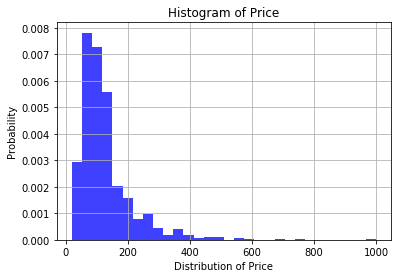

In [2]:
plt.figure(figsize=(6,4))

plt.hist(df_list.price_dollar, 30, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Distribution of Price')
plt.ylabel('Probability')
plt.title('Histogram of Price')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(60, 100)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

From the above graph we observe right skewed distribution for Price. So it might be better to use logarithm of the price in order to remove this skewness


C:\python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


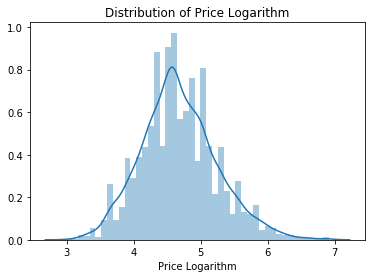

In [3]:
df_list['log_price_dollar']=np.log(df_list.price_dollar)

g=sns.distplot(df_list.log_price_dollar)

g.set_title('Distribution of Price Logarithm')
g.set(xlabel="Price Logarithm")
plt.show()

Let's try to find if there are columns in the dataset with same values in each. This causes serious problems in modelling process. 
Cases with variables with the same values is multicollinearity. This breaks the assumption of linear model 

In [4]:
from itertools import combinations

[(i, j) for i,j in combinations(df_list, 2) if df_list[i].equals(df_list[j])]

[('host_listings_count', 'host_total_listings_count'),
 ('cleaning_fee_dollar', 'extra_people_dollar')]

Now, we will search for columns in dataset which has the same value in each row:

In [5]:
uniques = df_list.apply(lambda x: x.nunique())
uniques[uniques==1]

has_availability_bool    1
requires_license_bool    1
dtype: int64

We will proceed in modelling steps.


1st thing to do is to drop any variable which is not going to be used in model. So along with variables:
- host_total_listings_count 
and
- extra_people_dollar

which had the same values with host_listings_count & cleaning_fee_dollar correspondingly and

variables:
- has_availability_bool
and 
- requires_license_bool

which have 1 unique value for the entire column,

we remove as redundants the following columns
1) host_neighbourhood
2) neighbourhood_group_cleansed
3) smart_location
4) latitude
5) longitude
6) amenities
7) calendar_updated
8) first_review
9) last_review
10) price_dollar
11) id

In [6]:
df_list = df_list.drop([
'has_availability_bool',
'requires_license_bool',
'host_total_listings_count',
'extra_people_dollar',
'id',
'host_neighbourhood',
'neighbourhood_group_cleansed',
'smart_location',
'latitude',
'longitude',
'amenities',
'calendar_updated',
'first_review',
'last_review',
'weekly_price_dollar',
'monthly_price_dollar',
'price_dollar'
], axis=1)

df_list.head()

,host_response_time,reviews_per_month,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,within a few hours,4.07,3.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,False,False,False,True,NaN,NaN,96.0,4.442651
1,within an hour,1.48,6.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,False,True,True,True,100.0,40.0,98.0,5.010635
2,within a few hours,1.15,2.0,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.0,6.882437
3,NaN,NaN,1.0,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,False,False,False,False,NaN,NaN,NaN,4.605170
4,within an hour,0.89,2.0,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,False,False,False,False,700.0,125.0,100.0,6.109248


First thing to do is to explore our data. 
Lets have a look in our dataset and measure the percentage of missing values for each variable

In [7]:
percent_of_null = 1-(df_list.count(axis=0)/df_list.shape[0])

print("The percentage of missing values for each of",df_list.shape[1],"columns in df_list dataset are: ")
print("\n")
print(percent_of_null)


The percentage of missing values for each of 40 columns in df_list dataset are: 


host_response_time                       0.136983
reviews_per_month                        0.164222
host_listings_count                      0.000524
property_type                            0.000262
room_type                                0.000000
accommodates                             0.000000
bathrooms                                0.004191
bedrooms                                 0.001572
beds                                     0.000262
bed_type                                 0.000000
square_feet                              0.974594
guests_included                          0.000000
minimum_nights                           0.000000
maximum_nights                           0.000000
availability_30                          0.000000
availability_60                          0.000000
availability_90                          0.000000
availability_365                         0.000000
number_of_reviews

So from 45 variables in our dataset, 41 have very low proportion of missing values (<20%).

2 have relatively small percentage of missing values, nearly at 25-26%. These columns are:cleaning_fee_dollar & extra_people_dollar.

Variable security_deposit_dollar has significanlty big percentage of missing values, 51%. 

These 3 columns has information about some extra cost that some hosts require from their customers. Missing values in these cases can be imputed with zero. Because missing value means no extra cost.

Column square_feet has very big percentage of missing values, 97%. It will be removed from dataset because it is neither useful nor practical to impute such high percentage of missing values.


For the rest of the variables, we will impute missing values with the average of each respective column regarding float and integer ones. 
Boolean columns do not have any missing values, so no imputation actions will be applied on them
From categorical variables, dummy variables will be created for every attribute in them, missing values included. 

Before starting imputing any missing values, we will drop any row where "log_price" (which will the response variable) has missing values

In [10]:
print("Before dropping any row with missing values in column 'log_price_dolar', the number of rows was:", df_list.shape[0])
df_list=df_list.dropna(subset=['log_price_dollar'], axis=0)
print("After dropping rows with missing values in column 'log_price_dolar', the number of rows is:", df_list.shape[0])


Before dropping any row with missing values in column 'log_price_dolar', the number of rows was: 3818
After dropping rows with missing values in column 'log_price_dolar', the number of rows is: 3818


We are dropping square_feet column from our dataset

In [8]:
df_list = df_list.drop([
'square_feet'
], axis=1)

df_list.head()

,host_response_time,reviews_per_month,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,within a few hours,4.07,3.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,2,False,True,True,True,False,False,False,True,NaN,NaN,96.0,4.442651
1,within an hour,1.48,6.0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,True,True,True,True,False,True,True,True,100.0,40.0,98.0,5.010635
2,within a few hours,1.15,2.0,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.0,6.882437
3,NaN,NaN,1.0,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,False,True,True,True,False,False,False,False,NaN,NaN,NaN,4.605170
4,within an hour,0.89,2.0,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,1,False,True,True,True,False,False,False,False,700.0,125.0,100.0,6.109248


Impute missing values with zero for columns bearing information for extra costs:
1) security_deposit_dollar	
2) cleaning_fee_dollar


In [9]:
cost_vars = df_list[['security_deposit_dollar','cleaning_fee_dollar']]

for col in cost_vars:
    df_list[col].fillna(0, inplace=True)


df_list[['security_deposit_dollar','cleaning_fee_dollar']]

,security_deposit_dollar,cleaning_fee_dollar
0,0.0,0.0
1,100.0,40.0
2,1000.0,300.0
3,0.0,0.0
4,700.0,125.0
5,0.0,40.0
6,150.0,0.0
7,150.0,25.0
8,0.0,0.0
9,100.0,40.0


Now, we will impute or the rest of integer and float type columns the missing values with their respective average

In [10]:
num_vars = df_list.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_list[col].fillna((df_list[col].mean()), inplace=True)
    
df_list.select_dtypes(include=['float', 'int'])

,reviews_per_month,host_listings_count,bathrooms,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar
0,4.070000,3.0,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0.0,0.0,96.000000,4.442651
1,1.480000,6.0,1.0,1.0,1.0,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.0,40.0,98.000000,5.010635
2,1.150000,2.0,4.5,5.0,7.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1000.0,300.0,67.000000,6.882437
3,2.078919,1.0,1.0,0.0,2.0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,0.0,0.0,94.886798,4.605170
4,0.890000,2.0,2.0,3.0,3.0,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,700.0,125.0,100.000000,6.109248
5,2.450000,1.0,1.0,1.0,1.0,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0,40.0,94.886798,4.787492
6,2.460000,1.0,1.0,1.0,1.0,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.0,0.0,100.000000,4.382027
7,4.730000,5.0,1.0,1.0,1.0,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,150.0,25.0,100.000000,4.094345
8,1.220000,1.0,1.0,1.0,1.0,97.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,0.0,0.0,94.886798,4.499810
9,1.550000,6.0,1.0,1.0,1.0,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.0,40.0,98.000000,5.010635


Before we move into the modelling step, we will transform categorical variables into dummies for each of their attributes, for missing values, too.

In [11]:
def create_dummy_df(df, dummy_na):
    i=-1
    cat_cols=df.select_dtypes(include=['object']).columns.get_values().tolist()
    for column in cat_cols:
        i=i+1
        df=pd.merge(df.drop([column],axis=1), 
                pd.get_dummies(df[[column]], prefix=cat_cols[i], drop_first=False,dummy_na=dummy_na), 
                left_index=True, right_index=True)
     
    return df

In [12]:
df = create_dummy_df(df_list, dummy_na=False) 
df.head(6)

,reviews_per_month,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,host_is_superhost_bool,host_has_profile_pic_bool,host_identity_verified_bool,is_location_exact_bool,instant_bookable_bool,require_guest_profile_picture_bool,require_guest_phone_verification_bool,host_acceptance_rate_bool,security_deposit_dollar,cleaning_fee_dollar,host_response_rate_perc,log_price_dollar,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,4.070000,3.0,4,1.0,1.0,1.0,2,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,False,True,True,True,False,False,False,True,0.0,0.0,96.000000,4.442651,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1.480000,6.0,4,1.0,1.0,1.0,1,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,True,True,True,True,False,True,True,True,100.0,40.0,98.000000,5.010635,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1.150000,2.0,11,4.5,5.0,7.0,10,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,False,True,True,True,False,False,False,True,1000.0,300.0,67.000000,6.882437,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3,2.078919,1.0,3,1.0,0.0,2.0,1,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,False,True,True,True,False,False,False,False,0.0,0.0,94.886798,4.605170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
4,0.890000,2.0,6,2.0,3.0,3.0,6,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,False,True,True,True,False,False,False,False,700.0,125.0,100.000000,6.109248,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
5,2.450000,1.0,2,1.0,1.0,1.0,1,1,6,0,0,27,302,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,False,True,True,True,False,False,False,False,0.0,40.0,94.886798,4.787492,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


Let's measure how many variables we have available in our final dataset, df, and examine if this number might create overfitting problems

In [13]:
print("Number of columns in the final dataset df is:", df.shape[1])
print("Number of rows in the final dataset df is:", df.shape[0])

Number of columns in the final dataset df is: 65
Number of rows in the final dataset df is: 3818


So there is no risk for overfitting due to the number of independent variables.

Now we will create our model:

In [14]:
#Split into explanatory and response variables

X = df.drop(['log_price_dollar'],axis=1).astype(float)
y = df['log_price_dollar'].astype(float)
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=43) 
  
#Predict and score the model
lm = LinearRegression(normalize=False) # I have logarithmic number for price_dollar so I will not normalize
lm.fit(X_train, y_train) #Fit
y_test_preds =lm.predict(X_test)

#Rsquared and y3_test

rsquared_score = r2_score(y_test, y_test_preds)#r2_score
length_y_test =len(y_test)#num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.6616921591659906 on 1146 values.'

So we have fitted a quite good model, with relatively high r square.
Now we will create the output for the above model:

In [15]:
# Found the below code here: 
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm
from scipy import stats

params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X_train)


newX = np.append(np.ones((len(X_train),1)), X_train, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

# Instead of DataFrame above we could change thw two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))


var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
f=X_train.columns.get_values().tolist()
f.insert(0,'constant')
myDF3.index=f
myDF3

C:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,Coefficients,Standard Errors,t values,Probabilites
constant,3.1578,NaN,NaN,NaN
reviews_per_month,-0.0142,0.005,-2.812,0.005
host_listings_count,0.0002,0.000,0.755,0.450
accommodates,0.0578,0.008,7.402,0.000
bathrooms,0.0919,0.015,6.315,0.000
bedrooms,0.1317,0.014,9.672,0.000
beds,-0.0136,0.011,-1.190,0.234
guests_included,0.0106,0.006,1.808,0.071
minimum_nights,-0.0000,0.000,-0.012,0.990
maximum_nights,-0.0000,0.000,-1.163,0.245


So we have the above output from the liner model we have fitted in the repsective data.

Now we will try to optimize our model, by removing these variables whic are insignificant, i.e.: columns with Probability>0.05

In [16]:
drop_var=myDF3[myDF3.Probabilites>0.05].index.get_values().tolist()
drop_var

['host_listings_count',
 'beds',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'number_of_reviews',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'host_has_profile_pic_bool',
 'host_identity_verified_bool',
 'instant_bookable_bool',
 'require_guest_profile_picture_bool',
 'require_guest_phone_verification_bool',
 'security_deposit_dollar',
 'host_response_rate_perc',
 'host_response_time_a few days or more',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',

Now we fit a new model, without the above variables:

In [17]:
X2 = X.drop(drop_var,axis=1).astype(float)
y2 = df['log_price_dollar'].astype(float)
#Split into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state=43) 
  
#Predict and score the model
lm2 = LinearRegression(normalize=False) # I have logarithmic number for price_dollar so I will not normalize
lm2.fit(X2_train, y2_train) #Fit
y2_test_preds =lm2.predict(X2_test)

#Rsquared and y_test

rsquared_score2 = r2_score(y2_test, y2_test_preds)#r2_score
length_y2_test =len(y2_test)#num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score2, length_y2_test)

'The r-squared score for your model was 0.6485622199073001 on 1146 values.'

We create the output of the updated model:

In [18]:
params2 = np.append(lm2.intercept_,lm2.coef_)
predictions2 = lm2.predict(X2_train)


newX2 = np.append(np.ones((len(X2_train),1)), X2_train, axis=1)
MSE2 = (sum((y2_train-predictions2)**2))/(len(newX2)-len(newX2[0]))


var_b2 = MSE2*(np.linalg.inv(np.dot(newX2.T,newX2)).diagonal())
sd_b2 = np.sqrt(var_b2)
ts_b2 = params2/ sd_b2

p_values2 =[2*(1-stats.t.cdf(np.abs(i),(len(newX2)-1))) for i in ts_b2]

sd_b2 = np.round(sd_b2,3)
ts_b2 = np.round(ts_b2,3)
p_values2 = np.round(p_values2,4)
params2 = np.round(params2,4)

myDF3f = pd.DataFrame()
myDF3f["Coefficients"],myDF3f["Standard Errors"],myDF3f["t values"],myDF3f["Probabilites"] = [params2,sd_b2,ts_b2,p_values2]
f2=X2_train.columns.get_values().tolist()
f2.insert(0,'constant')
myDF3f.index=f2
myDF3f

,Coefficients,Standard Errors,t values,Probabilites
constant,3.1924,836208.750,0.000,1.0000
reviews_per_month,-0.0178,0.004,-4.068,0.0000
accommodates,0.0557,0.006,9.044,0.0000
bathrooms,0.0870,0.014,6.253,0.0000
bedrooms,0.1176,0.013,9.274,0.0000
availability_365,0.0003,0.000,5.761,0.0000
review_scores_rating,0.0045,0.002,2.814,0.0049
review_scores_accuracy,0.0272,0.013,2.048,0.0406
review_scores_location,0.0937,0.012,7.658,0.0000
review_scores_value,-0.0812,0.013,-6.033,0.0000


In [19]:
drop_var2=myDF3f[myDF3f.Probabilites>0.05].index.get_values().tolist()
drop_var2

['constant',
 'is_location_exact_bool',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

We iterate the above process. We will run the model, removing the above four variables from the candidate variables and we will fit the model again:

In [20]:
X22 = X2.drop(drop_var2[1:],axis=1).astype(float)
y22 = df['log_price_dollar'].astype(float)
#Split into train and test
X22_train, X22_test, y22_train, y22_test = train_test_split(X22, y22, test_size = .30, random_state=43) 
  
#Predict and score the model
lm22 = LinearRegression(normalize=False) # I have logarithmic number for price_dollar so I will not normalize
lm22.fit(X22_train, y22_train) #Fit
y22_test_preds =lm22.predict(X22_test)

#Rsquared and y_test

rsquared_score22 = r2_score(y22_test, y22_test_preds)#r2_score
length_y22_test =len(y22_test)#num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score22, length_y22_test)

'The r-squared score for your model was 0.5446263171990213 on 1146 values.'

The new output is:

In [21]:
params22 = np.append(lm22.intercept_,lm22.coef_)
predictions22 = lm22.predict(X22_train)


newX22 = np.append(np.ones((len(X22_train),1)), X22_train, axis=1)
MSE22 = (sum((y22_train-predictions22)**2))/(len(newX22)-len(newX22[0]))


var_b22 = MSE22*(np.linalg.inv(np.dot(newX22.T,newX22)).diagonal())
sd_b22 = np.sqrt(var_b22)
ts_b22 = params22/ sd_b22

p_values22 =[2*(1-stats.t.cdf(np.abs(i),(len(newX22)-1))) for i in ts_b22]

sd_b22 = np.round(sd_b22,3)
ts_b22 = np.round(ts_b22,3)
p_values22 = np.round(p_values22,4)
params22 = np.round(params22,4)

myDF3ff = pd.DataFrame()
myDF3ff["Coefficients"],myDF3ff["Standard Errors"],myDF3ff["t values"],myDF3ff["Probabilites"] = [params22,sd_b22,ts_b22,p_values22]
f22=X22_train.columns.get_values().tolist()
f22.insert(0,'constant')
myDF3ff.index=f22
myDF3ff

,Coefficients,Standard Errors,t values,Probabilites
constant,3.3322,0.158,21.076,0.0000
reviews_per_month,-0.0194,0.005,-3.883,0.0001
accommodates,0.1238,0.007,18.973,0.0000
bathrooms,0.0189,0.016,1.198,0.2310
bedrooms,0.0351,0.014,2.477,0.0133
availability_365,0.0001,0.000,1.230,0.2187
review_scores_rating,0.0024,0.002,1.345,0.1787
review_scores_accuracy,0.0548,0.015,3.606,0.0003
review_scores_location,0.1169,0.014,8.372,0.0000
review_scores_value,-0.0986,0.015,-6.390,0.0000


In [22]:
drop_var22=myDF3ff[myDF3ff.Probabilites>0.05].index.get_values().tolist()
drop_var22

['bathrooms', 'availability_365', 'review_scores_rating']

In [23]:
X222 = X22.drop(drop_var22,axis=1).astype(float)
y222 = df['log_price_dollar'].astype(float)
#Split into train and test
X222_train, X222_test, y222_train, y222_test = train_test_split(X222, y222, test_size = .30, random_state=43) 
  
#Predict and score the model
lm222 = LinearRegression(normalize=False) # I have logarithmic number for price_dollar so I will not normalize
lm222.fit(X222_train, y222_train) #Fit
y222_test_preds =lm222.predict(X222_test)

#Rsquared and y_test

rsquared_score222 = r2_score(y222_test, y222_test_preds)#r2_score
length_y222_test =len(y222_test)#num in y_test

"The r-squared score for your model was {} on {} values.".format(rsquared_score222, length_y222_test)

'The r-squared score for your model was 0.5419740032326401 on 1146 values.'

In [24]:
params222 = np.append(lm222.intercept_,lm222.coef_)
predictions222 = lm222.predict(X222_train)


newX222 = np.append(np.ones((len(X222_train),1)), X222_train, axis=1)
MSE222 = (sum((y222_train-predictions222)**2))/(len(newX222)-len(newX222[0]))


var_b222 = MSE222*(np.linalg.inv(np.dot(newX222.T,newX222)).diagonal())
sd_b222 = np.sqrt(var_b222)
ts_b222 = params222/ sd_b222

p_values222 =[2*(1-stats.t.cdf(np.abs(i),(len(newX222)-1))) for i in ts_b222]

sd_b222 = np.round(sd_b222,3)
ts_b222 = np.round(ts_b222,3)
p_values222 = np.round(p_values222,6)
params222 = np.round(params222,6)

myDF3fff = pd.DataFrame()
myDF3fff["Coefficients"],myDF3fff["Standard Errors"],myDF3fff["t values"],myDF3fff["Probabilites"] = [params222,sd_b222,ts_b222,p_values222]
f222=X222_train.columns.get_values().tolist()
f222.insert(0,'constant')
myDF3fff.index=f222
myDF3fff


,Coefficients,Standard Errors,t values,Probabilites
constant,3.397025,0.155,21.953,0.000000
reviews_per_month,-0.020027,0.005,-4.011,0.000062
accommodates,0.124586,0.006,19.210,0.000000
bedrooms,0.038968,0.013,2.901,0.003750
review_scores_accuracy,0.062429,0.014,4.394,0.000012
review_scores_location,0.119497,0.014,8.644,0.000000
review_scores_value,-0.088268,0.013,-6.572,0.000000
calculated_host_listings_count,-0.010675,0.001,-8.191,0.000000
host_is_superhost_bool,0.092736,0.019,4.758,0.000002
host_acceptance_rate_bool,-0.122769,0.027,-4.548,0.000006


df_data=pd.merge(X222_train, pd.DataFrame(y222_train), left_index=True, right_index=True)
sns.pairplot(df_data,x_vars=df_data.drop(['log_price_dollar'],axis=1), y_vars=['log_price_dollar'],
             height=1, aspect=.2, kind="reg");

In [25]:
df_data=pd.merge(X222_train, pd.DataFrame(y222_train), left_index=True, right_index=True)
df_data

,reviews_per_month,accommodates,bedrooms,review_scores_accuracy,review_scores_location,review_scores_value,calculated_host_listings_count,host_is_superhost_bool,host_acceptance_rate_bool,cleaning_fee_dollar,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,log_price_dollar
1589,2.310000,2.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,25.0,0.0,1.0,0.0,4.605170
2270,0.650000,8.0,4.000000,10.000000,8.000000,9.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.703782
328,1.170000,2.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.248495
353,0.990000,5.0,2.000000,9.000000,9.000000,7.000000,1.0,0.0,1.0,40.0,1.0,0.0,0.0,5.298317
474,6.100000,4.0,2.000000,10.000000,10.000000,10.000000,1.0,1.0,1.0,120.0,0.0,0.0,1.0,4.672829
2280,0.990000,1.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.499810
1841,2.078919,4.0,2.000000,9.636392,9.608916,9.452245,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.605170
2250,1.420000,2.0,0.000000,9.000000,9.000000,9.000000,1.0,0.0,1.0,20.0,0.0,1.0,0.0,4.499810
3686,2.078919,1.0,1.000000,9.636392,9.608916,9.452245,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.555348
3455,1.650000,2.0,1.000000,10.000000,10.000000,10.000000,2.0,1.0,1.0,0.0,0.0,0.0,1.0,4.248495


In [26]:
myDF3fff['Coefficients']

constant                                 3.397025
reviews_per_month                       -0.020027
accommodates                             0.124586
bedrooms                                 0.038968
review_scores_accuracy                   0.062429
review_scores_location                   0.119497
review_scores_value                     -0.088268
calculated_host_listings_count          -0.010675
host_is_superhost_bool                   0.092736
host_acceptance_rate_bool               -0.122769
cleaning_fee_dollar                      0.002990
host_response_time_within a day         -0.079264
host_response_time_within a few hours   -0.063407
host_response_time_within an hour       -0.121602
Name: Coefficients, dtype: float64

In [27]:
df_data['coeff']=3.397025
df_data["coef1"]=-0.020027*df_data["reviews_per_month"]
df_data["coef2"]=0.124586*df_data["accommodates"]
df_data["coef3"]=0.038968*df_data["bedrooms"]
df_data["coef4"]=0.062429*df_data["review_scores_accuracy"]
df_data["coef5"]=0.119497*df_data["review_scores_location"]
df_data["coef6"]=-0.088268*df_data["review_scores_value"]
df_data["coef7"]=-0.010675*df_data["calculated_host_listings_count"]
df_data["coef8"]=0.092736*df_data["host_is_superhost_bool"]
df_data["coef9"]=-0.122769*df_data["host_acceptance_rate_bool"]
df_data["coef10"]=0.002990*df_data["cleaning_fee_dollar"]
df_data["coef11"]=-0.079264*df_data["host_response_time_within a day"]
df_data["coef12"]=-0.063407*df_data["host_response_time_within a few hours"]
df_data["coef13"]=-0.121602*df_data["host_response_time_within an hour"]



df_data

,reviews_per_month,accommodates,bedrooms,review_scores_accuracy,review_scores_location,review_scores_value,calculated_host_listings_count,host_is_superhost_bool,host_acceptance_rate_bool,cleaning_fee_dollar,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,log_price_dollar,coeff,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,coef11,coef12,coef13
1589,2.310000,2.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,25.0,0.0,1.0,0.0,4.605170,3.397025,-0.046262,0.249172,0.038968,0.624290,1.194970,-0.882680,-0.010675,0.000000,-0.122769,0.07475,-0.000000,-0.063407,-0.000000
2270,0.650000,8.0,4.000000,10.000000,8.000000,9.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.703782,3.397025,-0.013018,0.996688,0.155872,0.624290,0.955976,-0.794412,-0.010675,0.000000,-0.122769,0.00000,-0.000000,-0.063407,-0.000000
328,1.170000,2.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.248495,3.397025,-0.023432,0.249172,0.038968,0.624290,1.194970,-0.882680,-0.010675,0.000000,-0.122769,0.00000,-0.000000,-0.000000,-0.121602
353,0.990000,5.0,2.000000,9.000000,9.000000,7.000000,1.0,0.0,1.0,40.0,1.0,0.0,0.0,5.298317,3.397025,-0.019827,0.622930,0.077936,0.561861,1.075473,-0.617876,-0.010675,0.000000,-0.122769,0.11960,-0.079264,-0.000000,-0.000000
474,6.100000,4.0,2.000000,10.000000,10.000000,10.000000,1.0,1.0,1.0,120.0,0.0,0.0,1.0,4.672829,3.397025,-0.122165,0.498344,0.077936,0.624290,1.194970,-0.882680,-0.010675,0.092736,-0.122769,0.35880,-0.000000,-0.000000,-0.121602
2280,0.990000,1.0,1.000000,10.000000,10.000000,10.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4.499810,3.397025,-0.019827,0.124586,0.038968,0.624290,1.194970,-0.882680,-0.010675,0.000000,-0.122769,0.00000,-0.079264,-0.000000,-0.000000
1841,2.078919,4.0,2.000000,9.636392,9.608916,9.452245,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.605170,3.397025,-0.041635,0.498344,0.077936,0.601590,1.148237,-0.834331,-0.010675,0.000000,-0.122769,0.00000,-0.000000,-0.000000,-0.121602
2250,1.420000,2.0,0.000000,9.000000,9.000000,9.000000,1.0,0.0,1.0,20.0,0.0,1.0,0.0,4.499810,3.397025,-0.028438,0.249172,0.000000,0.561861,1.075473,-0.794412,-0.010675,0.000000,-0.122769,0.05980,-0.000000,-0.063407,-0.000000
3686,2.078919,1.0,1.000000,9.636392,9.608916,9.452245,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.555348,3.397025,-0.041635,0.124586,0.038968,0.601590,1.148237,-0.834331,-0.010675,0.000000,-0.122769,0.00000,-0.000000,-0.063407,-0.000000
3455,1.650000,2.0,1.000000,10.000000,10.000000,10.000000,2.0,1.0,1.0,0.0,0.0,0.0,1.0,4.248495,3.397025,-0.033045,0.249172,0.038968,0.624290,1.194970,-0.882680,-0.021350,0.092736,-0.122769,0.00000,-0.000000,-0.000000,-0.121602


In [28]:
df_data['y_pred'] = df_data[["coeff",
"coef1",
"coef2",
"coef3",
"coef4",
"coef5",
"coef6",
"coef7",
"coef8",
"coef9",
"coef10",
"coef11",
"coef12",
"coef13"]].sum(axis=1)



df_data[['log_price_dollar','y_pred']].head(10)

,log_price_dollar,y_pred
1589,4.605170,4.453382
2270,5.703782,5.125570
328,4.248495,4.343267
353,5.298317,5.004414
474,4.672829,4.984210
2280,4.499810,4.264624
1841,4.605170,4.592121
2250,4.499810,4.323630
3686,3.555348,4.237590
3455,4.248495,4.415715


In [29]:
df_data['error']=df_data.log_price_dollar-df_data.y_pred
df_data['natural_error']=np.exp(df_data.log_price_dollar/df_data.y_pred)
df_data[['log_price_dollar','y_pred','error','natural_error']].head(10)

,log_price_dollar,y_pred,error,natural_error
1589,4.605170,4.453382,0.151789,2.812528
2270,5.703782,5.125570,0.578212,3.042895
328,4.248495,4.343267,-0.094772,2.659610
353,5.298317,5.004414,0.293903,2.882704
474,4.672829,4.984210,-0.311381,2.553657
2280,4.499810,4.264624,0.235185,2.872400
1841,4.605170,4.592121,0.013050,2.726017
2250,4.499810,4.323630,0.176180,2.831335
3686,3.555348,4.237590,-0.682242,2.314057
3455,4.248495,4.415715,-0.167220,2.617267


In [30]:
df_data['error_sq']=df_data.error*df_data.error

df_data[['error_sq','error']].head(10)

,error_sq,error
1589,0.023040,0.151789
2270,0.334329,0.578212
328,0.008982,-0.094772
353,0.086379,0.293903
474,0.096958,-0.311381
2280,0.055312,0.235185
1841,0.000170,0.013050
2250,0.031039,0.176180
3686,0.465454,-0.682242
3455,0.027963,-0.167220


C:\python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Maximum real cost: 1000.000000
Minimum real cost: 20.000000
Average real cost: 127.976166
Standard Deviation for real cost: 90.250022
Average error for estimated cost: 2.726748
Standard Deviation for error of estimated cost: 0.222523
Maximum cost: 4.405228
Minimum cost: 1.898532
Average cost: 2.726748
Standard Deviation cost: 0.222523
Skewness: 0.192319
Kurtosis: 1.371984
Strd Dev: 0.376362
T-test for error mean=0 :  Ttest_indResult(statistic=0.0021717335697286084, pvalue=0.998267289767808)


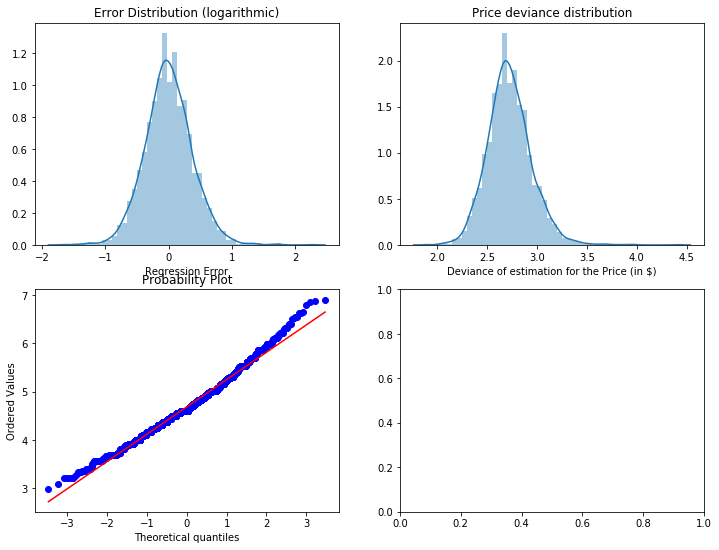

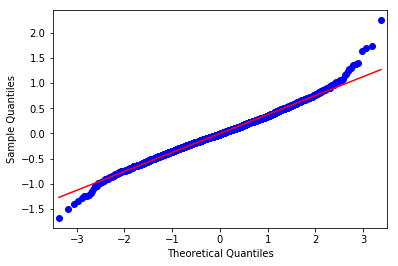

In [31]:
plt.figure(figsize=(12,9))

from scipy.stats import ttest_ind
from statsmodels.graphics.gofplots import qqplot as qq


df2 = pd.read_csv(r'C:\Users\5570 i5\Desktop\Udacity\Project 1\df_list.csv')


plt.subplot(2,2,1)
g=sns.distplot(df_data.error)

g.set_title('Error Distribution (logarithmic)')
g.set(xlabel="Regression Error")



plt.subplot(2,2,2)
g2=sns.distplot(df_data.natural_error)

g2.set_title('Price deviance distribution')
g2.set(xlabel="Deviance of estimation for the Price (in $)")




print("Maximum real cost: %f" % df2.price_dollar.max())
print("Minimum real cost: %f" % df2.price_dollar.min())

print("Average real cost: %f" % df2.price_dollar.mean())
print("Standard Deviation for real cost: %f" % df2.price_dollar.std())



print("Average error for estimated cost: %f" % df_data.natural_error.mean())
print("Standard Deviation for error of estimated cost: %f" % df_data.natural_error.std())






print("Maximum cost: %f" % df_data.natural_error.max())
print("Minimum cost: %f" % df_data.natural_error.min())

print("Average cost: %f" % df_data.natural_error.mean())
print("Standard Deviation cost: %f" % df_data.natural_error.std())


print("Skewness: %f" % df_data.error.skew())
print("Kurtosis: %f" % df_data.error.kurt())
print("Strd Dev: %f" % df_data.error.std())
print("T-test for error mean=0 : ", ttest_ind(df_data.error, df_data.host_is_superhost_bool-df_data.host_is_superhost_bool))

# above column created by df_data2.host_is_superhost_bool-df_data2.host_is_superhost_bool
# represents a columns with zero value in every row



plt.subplot(2,2,3)
stats.probplot(df_data.log_price_dollar, plot=plt)

plt.subplot(2,2,4)
qq(df_data.error, line='s')

plt.show()

From the above we can assume that our model has a heteroscedasticity issue.
For this analysis, we won't search it further (examine relationships of square errors with each independent variable in order to under stand which variable-s cause that problem and run a weighted regression, using as weights the values of problematic independend variable-s).

On the contrary we have a relatively good tool which we can use in order to estimate the value of Airbnb services in Seattle based on information about:

1)  Number of reviews per month
2)  Number of accomodates
3)  Number of bedrooms in each property
4)  Accuracy score rating
5)  Location score rating
6)  Average score value
7)  Count of  host's listing
8)  if the host is a superhost?
9)  Host acceptance
10)  Fee for cleaning services
11)  if host responds within few hours?
12)  if host responds within a day?
13)  if host responds within an hour?

So multiplying the coefficients:

1) -0,020027
2) 0,124586
3) 0,038968
4) 0,062429
5) 0,119497
6) -0,088268
7) -0,010675
8) 0,092736
9) -0,122769
10) 0,00299
11) -0,079264
12) -0,063407
13) -0,121602

with each corresponding variable, take the sum of all this multiplications and in the end add the constant, 3.397025, is a good approach of estimating the price for staying one night in Seattle using Airbnb

But if the above model is going to be used a guide for a guest in order to estimate the price that he is going to pay every night, then we MUST consider the boolean variable for "Host acceptance" as 1.

That happens because, a guest is interested to look for accomodation that is available, so "Host acceptance" (host_acceptance_rate_bool) should be always 1. 

This fetches some changes in the model, where we can exclude variable: host_acceptance_rate_bool and add its weight "-0.1222769" to the constant.

So the model, excluding host_acceptance_rate_bool, will have constant: "3.591979"



But to sum up, the above model (with its weakness) shows that the range in price values is beacuse of the the above variables.
This information is summarized in the following DataFrame:

In [32]:
data = [["Number of reviews in a month",-0.020027],
["Number of accomodates",0.124586],
["Number of bedrooms",0.038968],
["Accuracy score",0.062429],
["Location score",0.119497],
["Average  reviews score",-0.088268],
["Number of host listings",-0.010675],
["Is host as superhost? (1 for Yes, 0 for No)",0.092736],
["Host's acceptace",-0.122769],
["cleaning fee",0.00299],
["Does host response within a day? (1 for Yes, 0 for No)",-0.079264],
["Does host response within few hours? (1 for Yes, 0 for No)",-0.063407],
["Does host response within an hour? (1 for Yes, 0 for No)",-0.121602]
] 
  
df_vars_weights = pd.DataFrame(data, columns = ['Which?', 'How much?']) 

pd.set_option('display.max_colwidth', 70) # print all the contents of the columns 

df_vars_weights

,Which?,How much?
0,Number of reviews in a month,-0.020027
1,Number of accomodates,0.124586
2,Number of bedrooms,0.038968
3,Accuracy score,0.062429
4,Location score,0.119497
5,Average reviews score,-0.088268
6,Number of host listings,-0.010675
7,"Is host as superhost? (1 for Yes, 0 for No)",0.092736
8,Host's acceptace,-0.122769
9,cleaning fee,0.002990
